In [78]:
from methods import *
from pathlib import Path
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import cv2 as cv

In [79]:
data_path = (Path.cwd() / 'data' / 'Slice44-AllChannels.nii').as_posix()

In [80]:
img_nib = nib.load(data_path)

In [81]:
prev_img = combine_images(img_nib.dataobj)
prev_img = np.flip(prev_img, [0,1])

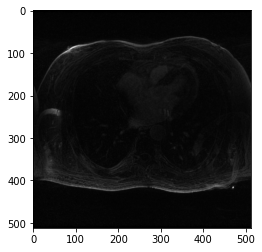

In [82]:
prev_img[prev_img < 50] = 0
plt.imshow(prev_img, cmap='gray')
plt.show()

In [83]:
prev_img.max()

4429.975553387425

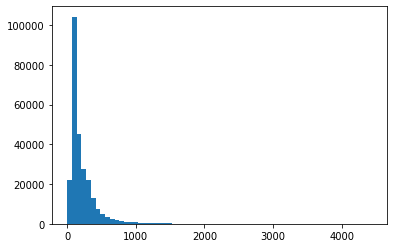

In [84]:
plt.hist(prev_img.flatten(), bins=64)
plt.show()

In [85]:
def window_image(image, window_center, window_width):

    img_min = window_center - window_width // 2

    img_max = window_center + window_width // 2

    print(img_min, img_max)
    window_image = image.copy()

    window_image[window_image < img_min] = img_min

    window_image[window_image > img_max] = img_max



    return window_image

In [86]:
img_sc = window_image(prev_img, 100, 1500)

-650 850


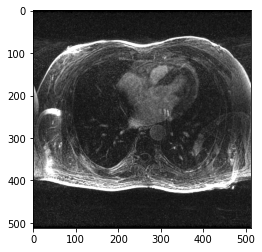

In [87]:
plt.imshow(img_sc, cmap='gray')
plt.show()

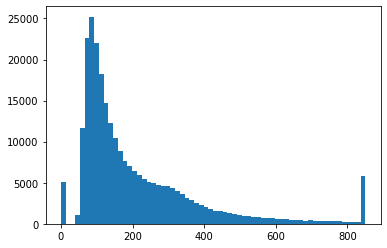

In [88]:
plt.hist(img_sc.flatten(), 64)
plt.show()

In [89]:
img_norm = cv.normalize(
    img_sc, None, 0, 255, 
    cv.NORM_MINMAX
)

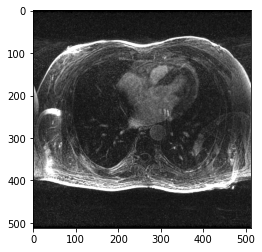

In [90]:
plt.imshow(img_norm, cmap='gray')
plt.show()

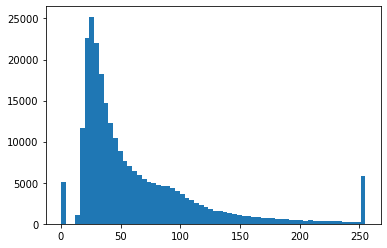

In [91]:
plt.hist(img_norm.flatten(), bins=64)
plt.show()

In [92]:
cv.imwrite("normalized.png", img_norm)

True

In [93]:
noise = cv.imread("normalized.png",0)

In [94]:
denoised = cv.fastNlMeansDenoising(noise, None)

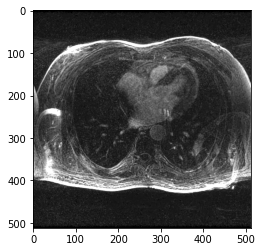

In [95]:
plt.imshow(denoised,cmap='gray')
plt.show()